In [1]:
data = open("Rapport.pgn", "r").read()

In [2]:
DELIM = '|'
chars = set(list(data))
chars.add(DELIM)

In [3]:
parts = data.split("\n\n")
games = ["\n".join([DELIM, header, "", moves, DELIM]) for header, moves in zip(parts[::2], parts[1::2])]
print(games[10])

|
[Event "16th Donau Open"]
[Site "Aschach Donau AUT"]
[Date "2007.12.27"]
[Round "3"]
[White "Rapport,R"]
[Black "Danilov,I"]
[Result "1/2-1/2"]
[WhiteElo "2197"]
[BlackElo "2414"]
[ECO "C66"]

1.e4 e5 2.Nf3 Nc6 3.Bb5 a6 4.Ba4 d6 5.c3 Nf6 6.O-O Bd7 7.Re1 h6 8.d4 Qe7
9.d5 Nd8 10.Nbd2 g6 11.Nf1 Bg7 12.Ng3 O-O 13.Bxd7 Nxd7 14.Nd2 Kh7 15.c4 Bf6
16.Nf3 Bg5 17.Nxg5+ hxg5 18.Qg4 f6 19.h4 Nf7 20.h5 Nh6 21.hxg6+ Kg7 22.Nf5+ Nxf5
23.exf5 Rh8 24.g3 Rh6 25.Be3 Rah8 26.Qe4 Rh2 27.Kf1 R8h3 28.g4 Qe8 29.Ke2 Qh8
30.Rg1 Qh4 31.b4 b6 32.a4 a5 33.bxa5 Nc5 34.Bxc5 Rb3 35.Ra2 bxc5 36.Ke1 Qh3
37.Ke2 Qc3 38.Rc2 Qxa5 39.Rh1 Rbh3 40.Rxh2 Rxh2 41.Kf3 Qxa4 42.Kg3 Rh8 43.Rc1 Qa3+
44.Qe3 Qa2 45.Qc3 Ra8 46.Kg2 Qe2 47.Qf3 Qb2 48.Rh1 Ra3 49.Qd1 Qc3 50.Rh7+ Kg8
51.Rh8+ Kg7 52.Rh7+ Kg8 53.Rh8+  1/2-1/2
|


In [5]:
stoi = {c: i for i, c in enumerate(sorted(chars))}
itos = {i: c for c, i in stoi.items()}

DELIM_INT = stoi['|']

In [6]:
import torch

order = len(chars)
stoi = {c: i for i, c in enumerate(sorted(chars))}
itos = {i: c for c, i in stoi.items()}

N = torch.zeros(order, order, dtype=torch.int32)
for item in games:
    for x, y in zip(item, item[1:]):
        N[stoi[x], stoi[y]] += 1

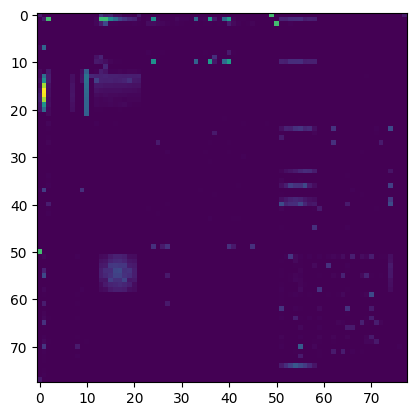

In [7]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [13]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [14]:
# Generate a new PGN
# Modify SEED to chang output

SEED = 0
generator = torch.Generator().manual_seed(SEED)

pgn = ""

ix = DELIM_INT
while True:
    #p = N[ix].float()
    #p = p / p.sum()
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=generator).item()
    if ix == DELIM_INT:
        break
    pgn += itos[ix]

print(pgn)



305 43 4.Qd Nch8.e 4 Rerapportenund2 Rhite2 "Rf48 Qd5.Qxd650-O-Oppo "]
[Sh7.Bd23 Bd8+ Qxf4 9.ck Nfd1.0.Nf8.Nb3 Qd2.Bloulante53.f6 Bxc6 Nesulo NeElt 202 6 Opo 3 26 2.b3.fd66 "]
1.Kckuk Rhxdxg6 and7"2"]

1/2  Qc6 2 Kf56 "2"]
18.Qxc4 O-O 4 Rhxc6.Kd5 Kb8 Yate Bexg41 2 3 2.Rxd4.Kfe3 "]
1.at Ro g25 19.Rxg4 Nxc6 "28 7.Qg4.Bd4 Nd2 "]
[Rxd2.KxckEla5 4 Bd1-11/25  23+ b7.02.f4 Q Nd5 1"]
[Eve6.Bloulac5 33 "Bxd2.Kf6 Qxf18.Ne Bd5.Bloppoud  Kg4+ Bc6 8 Nf6.c4 218.Nf1-A"RBf6+ Bitapppporl 18 Qxck c6 28.Bxh6
3.Qxb26 4.d7 1.Rxf3.Nxd3 df4.f32.Bgxa4 "Rc3.d8+ 5 4 5+ 7 c4.b1
20.Bg6.gxe5 Blte7 4 Re "]
[Ramate2.Be 1 2.2-110"Maxa6"]
[Whid4"]

[Dagxc5 R5+ Nc3 Qxf34 Rf4
[Wa6 Rxf31 20.5 Rd 3.Bd2.d49.Rb1.b5 Be1
5 c3.Nd1 Nb1.Qd20.fxeEv c6.ckECung7 Bxb6.e4 4 b5 Bg16 Rbxc2.18 O "Sit Qc3 "1  Bxd6 "CO-O e34 BlKf55.Ne40-2 4 "8.Nc8+ 25 "]
5 5 Bb4 2

9.Kd6 17 "1107 Qe7.Bd2.Qb4"]
[Sidd129.KeE92 Rxe27 2.Rh7
[EC0"]
[Elo Bxf26 Ela35 "2.Khe1.Nd18 a7 Ne 3.Qd74 4 g76"]
[Wh4"1.Bb5 d6.Kf26 Qf8.Rxd4
3 Bxe6 Ncxc40.Qe7 7 3.d6017 5.c5.

In [15]:
# Evaluate model with the negative log likelihood

log_likelihood = 0
num_bigrams = 0
L = P.log()

for item in games:
    for x, y in zip(item, item[1:]):
        log_likelihood += L[stoi[x], stoi[y]]
        num_bigrams += 1

average_nll = -(log_likelihood / num_bigrams).item()

print(f'{average_nll=}')

average_nll=2.1688690185546875
